In [15]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [9]:
df = pd.read_csv("export.csv", header=None)
df.head()

,0,1
0,130.959877,170.064639
1,147.954671,170.064639
2,170.947626,171.065019
3,121.962634,192.073004
4,122.962328,211.080228


In [10]:
df.shape

(1058, 2)

In [11]:
df.duplicated(keep=False).sum()

26

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated(keep=False).sum()

0

In [14]:
df.shape

(1045, 2)

In [24]:
x = [tuple(e) for e in df.values.tolist()]

In [21]:
# Calculate Distance between Two Data Points.
def dist(x, y):
    return math.dist(x, y)

In [25]:
dist_mat = {}
for i in range(len(x)):
    for j in range(len(x)):
        if i<=j:
            dist_mat[x[i], x[j]] = dist(x[i], x[j])
            dist_mat[x[j], x[i]] = dist_mat[x[i], x[j]]

In [27]:
def is_core(p, eps, k):
    n = []
    for i in x:
        if i !=  p:
            if dist_mat[i,p] <= eps:
                n.append(i)
    if len(n) < k:
        return [False, n]
    else:
        return [True, n]

In [28]:
def db_scan(x,eps,k):
    clusters = []
    x1 = x.copy()
    for i in x1:   
        core = is_core(i,eps,k)
        if core[0] == True:
            cluster = []
            x1.remove(i)
            cluster.append(i)
            for s in core[1]:
                x1.remove(s)
                cluster.append(s)
            for j in cluster:
                if j in x1:
                    x1.remove(j)
                core1 = is_core(j,eps,k)
                if core1[0] == True:
                    for t in core1[1]:
                        if t not in cluster:
                            cluster.append(t)
  
            clusters.append(cluster)
    return clusters


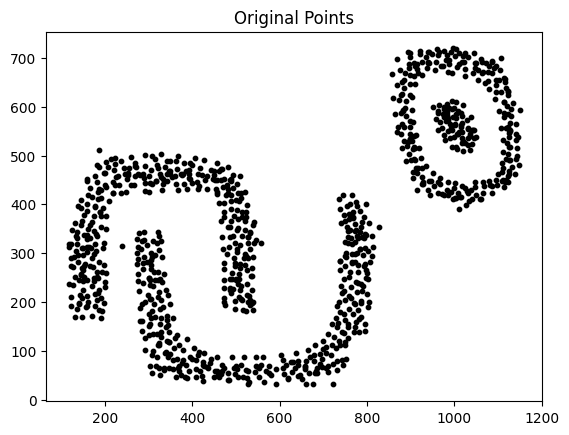

In [29]:
plt.scatter(*zip(*x),c='black',s=10)
plt.title('Original Points')
plt.show()

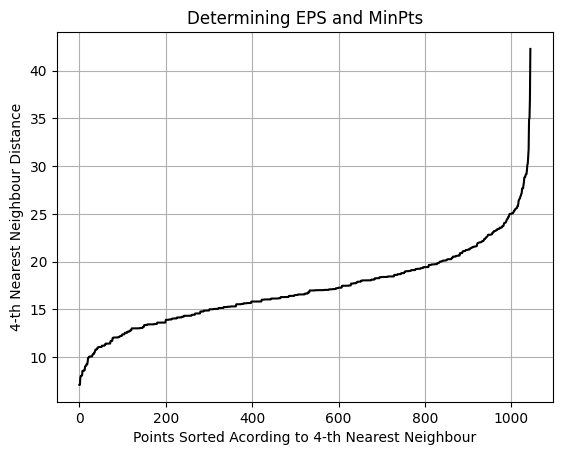

In [31]:
def nearest_dist(p,k):
    l = [dist_mat[p,i] for i in x]
    return sorted(l)[k]

min_pts = 4

d = sorted([nearest_dist(p,min_pts) for p in x])
plt.plot(range(len(d)), d, c='black')
plt.grid()
plt.title('Determining EPS and MinPts')
plt.ylabel('4-th Nearest Neighbour Distance')
plt.xlabel('Points Sorted Acording to 4-th Nearest Neighbour')
plt.show()

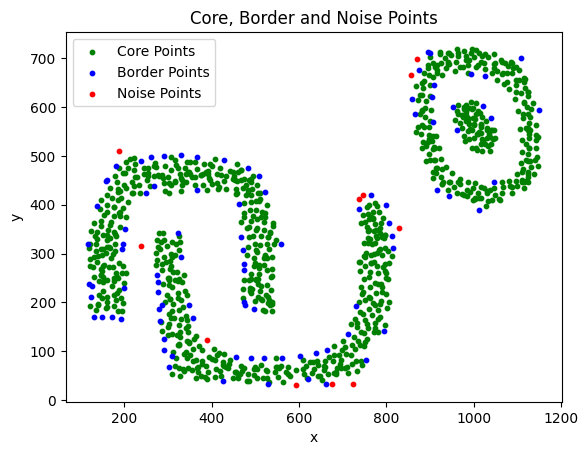

In [32]:
eps = 22.5

point_types = {}
point_types['Core Points'] = []
point_types['Border Points'] = []
point_types['Noise Points'] = []
for i in x:
    if is_core(i,eps,min_pts)[0] == True:
        point_types['Core Points'].append(i)

for i in x:
    if is_core(i,eps,min_pts)[0] == False:
        for j in is_core(i,eps,4)[1]:
            if j in point_types['Core Points']:
                point_types['Border Points'].append(i)
                break

for i in x:            
        if i not in point_types['Core Points']:
            if i not in point_types['Border Points']:
                point_types['Noise Points'].append(i)

color=['green','blue','red']
i = 0
for k,v in point_types.items():
    plt.scatter(*zip(*v),c=color[i],s=10, label = k)
    i = i+1
plt.xlabel('x')
plt.ylabel('y')
plt.title('Core, Border and Noise Points')
plt.legend()
plt.show()

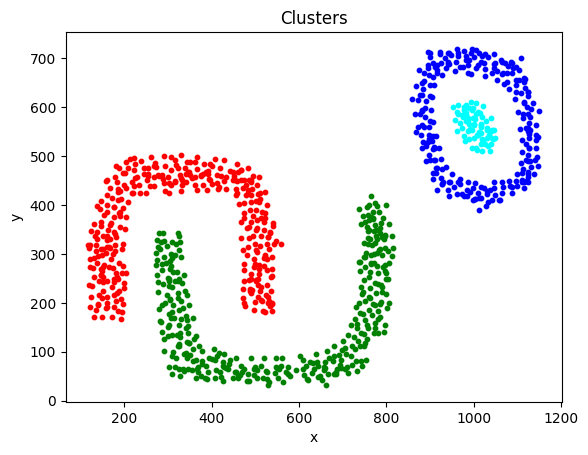

In [33]:
z = db_scan(x,eps,min_pts)
color=['red','green','blue','cyan','orange','yellow','magenta','black','purple','violet']
i = 0
for v in z:
    plt.scatter(*zip(*v),c=color[i],s=10)
    i = i+1
plt.xlabel('x')
plt.title('Clusters')
plt.ylabel('y')
    # plt.legend()
plt.show()